Data Loading

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [6]:
# Load your dataset 
df = pd.read_csv('/Users/lucasben/lucas-ben.github.io/datasets/Data-ATP-W119-PEW.csv')

/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/4273954748.py:2: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/lucasben/lucas-ben.github.io/datasets/Data-ATP-W119-PEW.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Columns: 156 entries, QKEY to WEIGHT_W119
dtypes: float64(1), int64(104), object(51)
memory usage: 13.1+ MB


In [8]:
df.describe()

,QKEY,DEVICE_TYPE_W119,LANG_W119,FORM_W119,DESRISK_COMF_W119,DESRISK_CREAT_W119,DESRISK_NTECH_W119,RISK2_W119,AI_HEARD_W119,CNCEXC_W119,...,F_RELIG,F_RELIGCAT1,F_ATTEND,F_PARTY_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_IDEO,F_VOLSUM,WEIGHT_W119
count,1.100400e+04,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,...,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000
mean,1.772323e+11,1.677027,1.039804,1.499182,2.989549,2.391130,2.582697,2.383588,1.911123,3.113413,...,5.228553,2.670029,4.390858,3.019538,1.740912,2.729008,10.047801,4.810251,1.882134,1.000000
std,6.611107e+10,0.524606,0.195507,0.500022,2.593657,2.431065,2.788196,9.631999,2.688112,8.834480,...,8.846445,7.884602,5.301660,9.056001,1.337942,1.732756,20.467926,13.402154,5.185202,1.150309
min,1.003140e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.008109
25%,2.018010e+11,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.397223
50%,2.018012e+11,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,5.000000,2.000000,2.000000,3.000000,6.000000,3.000000,2.000000,0.634431
75%,2.020010e+11,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,...,10.000000,3.000000,6.000000,3.000000,2.000000,4.000000,9.000000,4.000000,2.000000,1.093206
max,2.022011e+11,3.000000,2.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,99.000000,7.195378


Data Cleaning 

In [9]:
# Define and extract key variables
key_vars = [
    'AIHCCOMF_W119',             # Comfort with AI in healthcare
    'HCMEDBIAS_W119',            # Concern about bias
    'AIHCCHG_QUAL_W119',         # Quality of care
    'AIHCCHG_MIST_W119',         # Mistakes
    'AIHCCHG_REL_W119',          # Doctor-patient relationship
    'AIHCCHG_RACETHN_W119',      # Fairness
    'AIHCCHG_SECUR_W119',        # Security
    'AIKNOW_INDEX_W119',         # AI knowledge score
    'F_AGECAT',                  # Age group
    'F_RACECMB',                 # Race
    'F_EDUCCAT',                 # Education
    'F_INC_SDT1',                # Income
    'F_IDEO',                    # Political ideology
    'F_GENDER',                  # Gender
    'F_RELIG',                   # Religion
    'F_REG',                     # Region
    'F_INTFREQ',                 # Internet frequency
    'F_METRO',                   # Metropolitan area
    'F_CITIZEN',                 # Citizenship
    ]
df_subset = df[key_vars].copy()

Replace'99' (missing codes) with NaN

In [10]:
# Replace '99' (missing codes) with NaN
df_subset.replace(99, np.nan, inplace=True)

Recode trust in AI based on trust/comfort levels

In [11]:
# Recode trust in AI (comfort levels)
trust_map = {
    1: 'Very comfortable', 2: 'Somewhat comfortable',
    3: 'Somewhat uncomfortable', 4: 'Very uncomfortable'
}
df_subset['Comfort_Level'] = df_subset['AIHCCOMF_W119'].map(trust_map)

Recode concerns about  bias 

In [12]:
# Recode concern about bias
bias_map = {
    1: 'Definitely better', 2: 'Probably better',
    3: 'Stay the same', 4: 'Probably worse', 5: 'Definitely worse'
}
df_subset['Bias_Concern'] = df_subset['HCMEDBIAS_W119'].map(bias_map)

Recode Healthcare Impact Variables 

In [13]:
# Recode healthcare impact variables
impact_map = {1: 'Better', 2: 'Worse', 3: 'No difference'}
for col in ['AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119',
            'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119']:
    df_subset[f'{col}_Label'] = df_subset[col].map(impact_map)


Recoding Demographic Variables 

In [14]:
# Recode demographics
age_map = {1: '18–29', 2: '30–49', 3: '50–64', 4: '65+'}
race_map = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian', 5: 'Other/Mixed'}
edu_map = {1: 'Less than HS', 2: 'HS Grad', 3: 'Some College', 4: 'Bachelor+'}
ideo_map = {1: 'Very Conservative', 2: 'Conservative', 3: 'Moderate', 4: 'Liberal', 5: 'Very Liberal'}
gender_map ={1: 'Male', 2: 'Female'}  
relig_map = { 1: 'Protestant', 2: 'Evangelical', 3: 'Catholic', 4: 'Mormon', 5: 'Jewish', 6: 'Muslim', 7: 'Buddhist', 8: 'Hindu', 9: 'Atheist', 10: 'Agnostic', 11: 'Nothing in particular', 12: 'Other'}
internet_map = {1: 'Several times/day', 2: 'Once/day', 3: 'Few times/week', 4: 'Less often', 5: 'Never'}
region_map = {1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'}


# Map demographic variables
df_subset['Age Group'] = df_subset['F_AGECAT'].map(age_map)
df_subset['Race'] = df_subset['F_RACECMB'].map(race_map)
df_subset['Education'] = df_subset['F_EDUCCAT'].map(edu_map)
df_subset['Ideology'] = df_subset['F_IDEO'].map(ideo_map)
df_subset['Gender'] = df_subset['F_GENDER'].map(gender_map)
df_subset['Religion'] = df_subset['F_RELIG'].map(relig_map)
df_subset['Internet Use'] = df_subset['F_INTFREQ'].map(internet_map)
df_subset['Region'] = df_subset['F_REG'].map(region_map)

Grouping Income into Buckets

In [15]:
# Group income into buckets
def group_income(val):
    if val in [1, 2, 3, 4]:
        return 'Low Income'
    elif val in [5, 6, 7]:
        return 'Middle Income'
    elif val in [8, 9]:
        return 'High Income'
    return np.nan

df_subset['Income Group'] = df_subset['F_INC_SDT1'].apply(group_income)

Recoding 'Trust Variable' 

In [16]:
# Optional: Create binary trust variable for modeling
df_subset['Trust_Binary'] = df_subset['AIHCCOMF_W119'].apply(
    lambda x: 1 if x in [1, 2] else (0 if x in [3, 4] else np.nan))

# Optional: Create 3-level trust category
def trust_level(x):
    if x == 1:
        return 'High Trust'
    elif x == 2 or x == 3:
        return 'Moderate Trust'
    elif x == 4:
        return 'Low Trust'
    return np.nan

df_subset['Trust_Level'] = df_subset['AIHCCOMF_W119'].apply(trust_level)

Dropping Rows with missing values 

In [17]:
# Final step: drop rows with missing key analysis values
clean_df = df_subset.dropna(subset=[
    'AIHCCOMF_W119', 'AIKNOW_INDEX_W119',
    'F_AGECAT', 'F_RACECMB', 'F_EDUCCAT', 'F_INC_SDT1'
])

# Preview cleaned dataset
clean_df.head()


,AIHCCOMF_W119,HCMEDBIAS_W119,AIHCCHG_QUAL_W119,AIHCCHG_MIST_W119,AIHCCHG_REL_W119,AIHCCHG_RACETHN_W119,AIHCCHG_SECUR_W119,AIKNOW_INDEX_W119,F_AGECAT,F_RACECMB,...,Race,Education,Ideology,Gender,Religion,Internet Use,Region,Income Group,Trust_Binary,Trust_Level
0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,0,4.0,1.0,...,White,HS Grad,Conservative,Male,Protestant,NaN,NaN,Low Income,1.0,High Trust
1,2.0,2.0,1.0,1.0,3.0,1.0,2.0,6,2.0,1.0,...,White,Less than HS,Moderate,Female,Evangelical,NaN,NaN,High Income,1.0,Moderate Trust
2,3.0,2.0,3.0,2.0,2.0,3.0,3.0,6,3.0,1.0,...,White,Less than HS,Conservative,Female,Protestant,NaN,NaN,High Income,0.0,Moderate Trust
3,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2,4.0,1.0,...,White,HS Grad,Conservative,Female,Protestant,NaN,NaN,Middle Income,0.0,Moderate Trust
4,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3,4.0,1.0,...,White,Less than HS,Conservative,Male,Protestant,NaN,NaN,High Income,0.0,Moderate Trust


Distribution of Trust/Comfort with AI

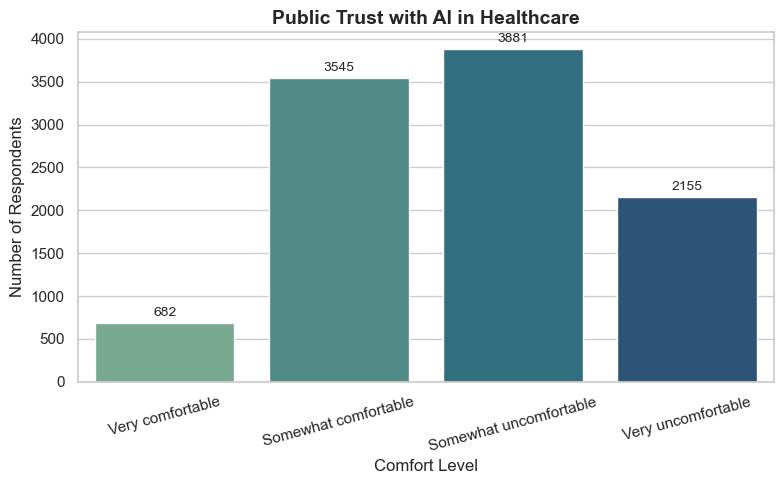

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent visual theme for business clarity
sns.set_theme(style="whitegrid", palette="muted")

# Define order of labels for x-axis
comfort_order = [
    'Very comfortable',
    'Somewhat comfortable',
    'Somewhat uncomfortable',
    'Very uncomfortable'
]

# Countplot of comfort with AI in healthcare
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=clean_df,
    x='Comfort_Level',
    order=comfort_order,
    palette='crest'
)
# Clean labeling
ax.set_title('Public Trust with AI in Healthcare', fontsize=14, fontweight='bold')
ax.set_xlabel('Comfort Level', fontsize=12)
ax.set_ylabel('Number of Respondents', fontsize=12)
# This adds value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()




Trust/ Comfort by Age Group

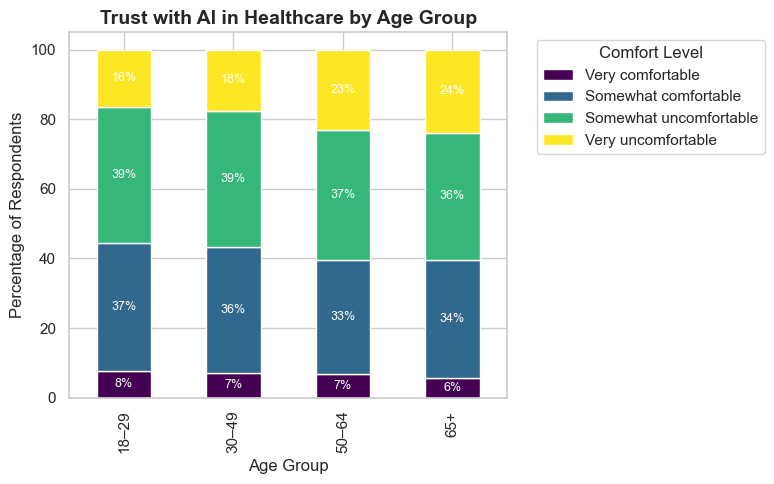

In [19]:
# Set plot theme
sns.set_theme(style="whitegrid")

# Crosstab: % breakdown of comfort by age
age_comfort = pd.crosstab(
    clean_df['Age Group'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

# Reorder columns for consistent plotting
comfort_order = [
    'Very comfortable',
    'Somewhat comfortable',
    'Somewhat uncomfortable',
    'Very uncomfortable'
]
age_comfort = age_comfort[comfort_order]

# Plot
ax = age_comfort.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))

# Title & axis labels
plt.title('Trust with AI in Healthcare by Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.xlabel('Age Group', fontsize=12)

# Legend
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()


Concern about Bias by Age Group

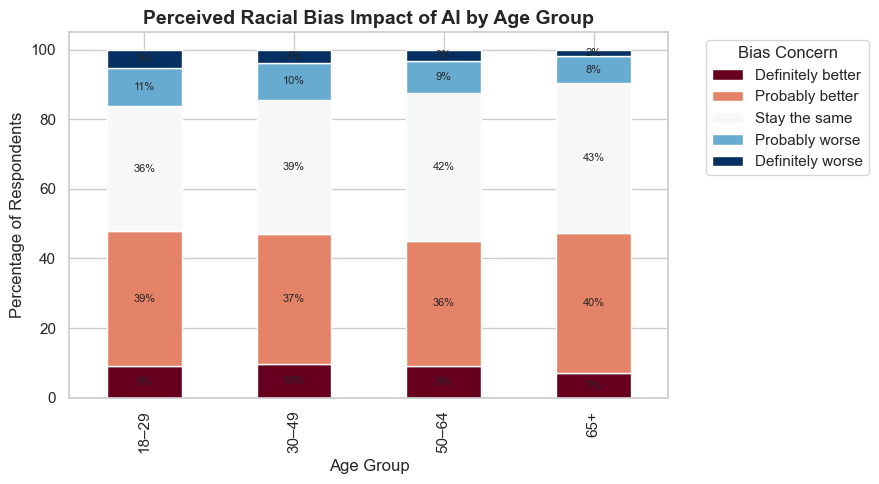

In [20]:
group_var = 'Age Group'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


Trust/Comfort by Income Group

- Do people with different income levels feel more or less comfortable with AI in healthcare?

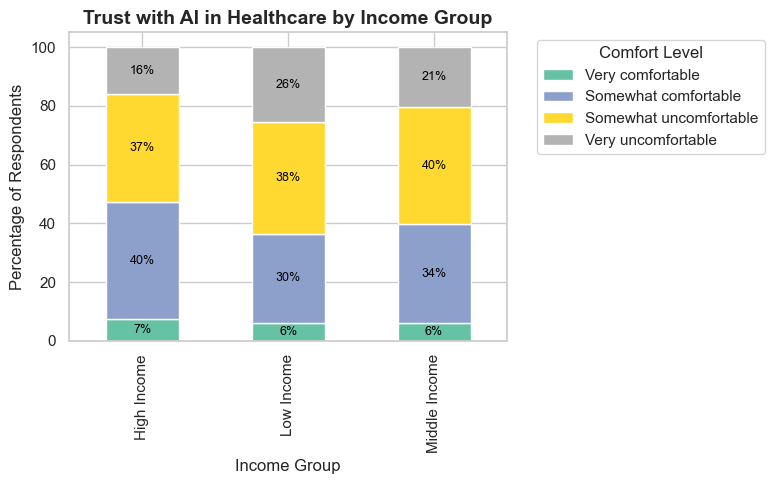

In [21]:
# Crosstab of comfort level by income group (% breakdown)
income_comfort = pd.crosstab(
    clean_df['Income Group'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

# Reorder columns
comfort_order = [
    'Very comfortable',
    'Somewhat comfortable',
    'Somewhat uncomfortable',
    'Very uncomfortable'
]
income_comfort = income_comfort[comfort_order]

# Plot the stacked bar chart
ax = income_comfort.plot(
    kind='bar',
    stacked=True,
    colormap='Set2',
    figsize=(8, 5)
)

# Labels & style
plt.title('Trust with AI in Healthcare by Income Group', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.xlabel('Income Group', fontsize=12)
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Concern about Bias by Income Group

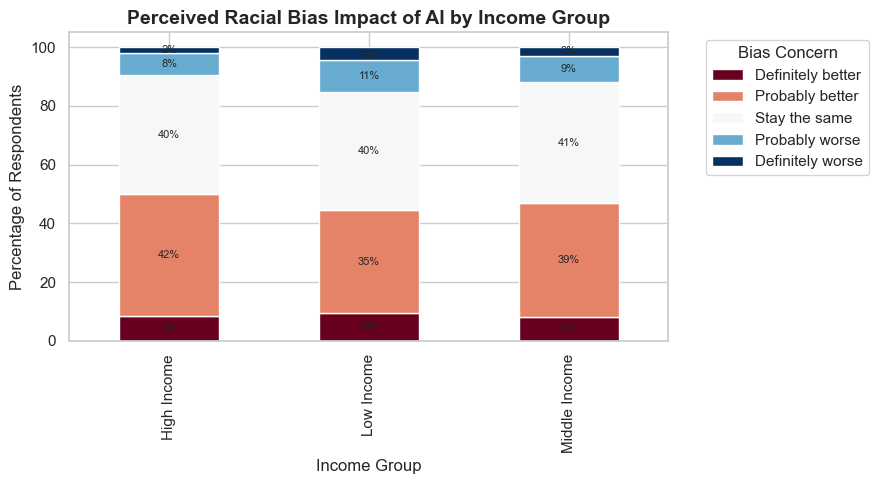

In [22]:
group_var = 'Income Group'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


AI Knowledge vs Trust/Comfort with AI 

- Are people with higher knowledge more comfortable with AI making healthcare decisions? 


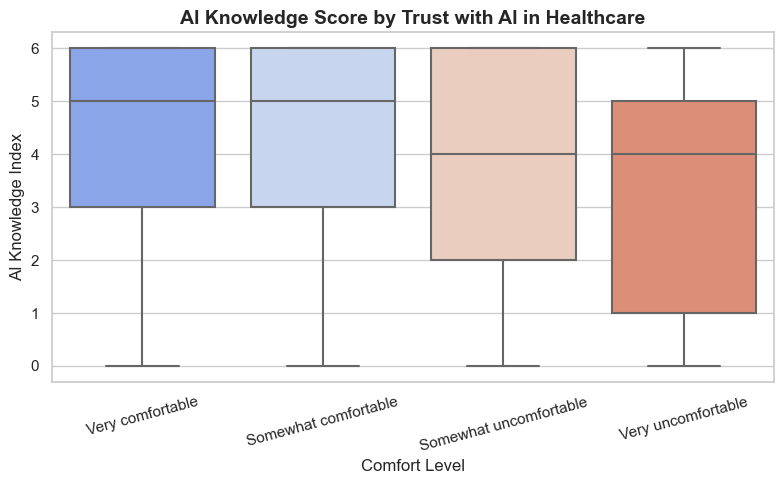

In [23]:
# Set theme for consistency
sns.set_theme(style="whitegrid")

# Plot boxplot of AI knowledge index vs comfort level
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=clean_df,
    x='Comfort_Level',
    y='AIKNOW_INDEX_W119',
    order=[
        'Very comfortable',
        'Somewhat comfortable',
        'Somewhat uncomfortable',
        'Very uncomfortable'
    ],
    palette='coolwarm'
)

# Labels and formatting
ax.set_title('AI Knowledge Score by Trust with AI in Healthcare', fontsize=14, fontweight='bold')
ax.set_xlabel('Comfort Level', fontsize=12)
ax.set_ylabel('AI Knowledge Index', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Trust/ Comfort by Race

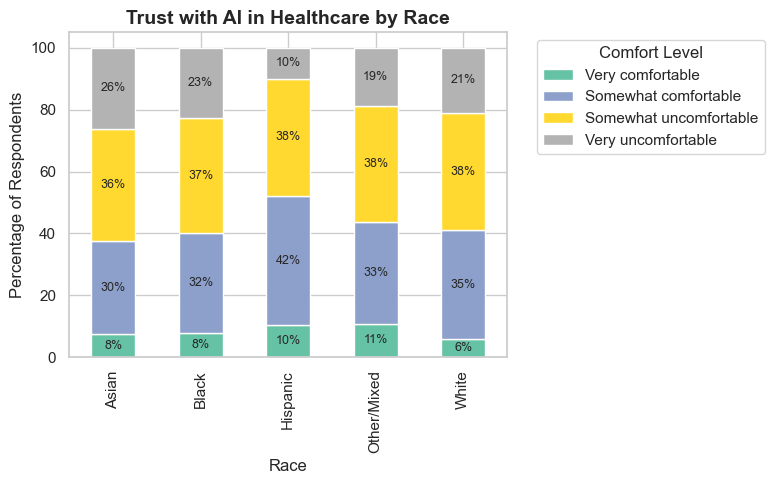

In [24]:
# Create crosstab (percent distribution)
race_comfort = pd.crosstab(
    clean_df['Race'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

# Reorder comfort columns
comfort_order = [
    'Very comfortable',
    'Somewhat comfortable',
    'Somewhat uncomfortable',
    'Very uncomfortable'
]
race_comfort = race_comfort[comfort_order]

# Plot
ax = race_comfort.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title('Trust with AI in Healthcare by Race', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Race')
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9)
plt.tight_layout()
plt.show()


Concern with Bias by Race

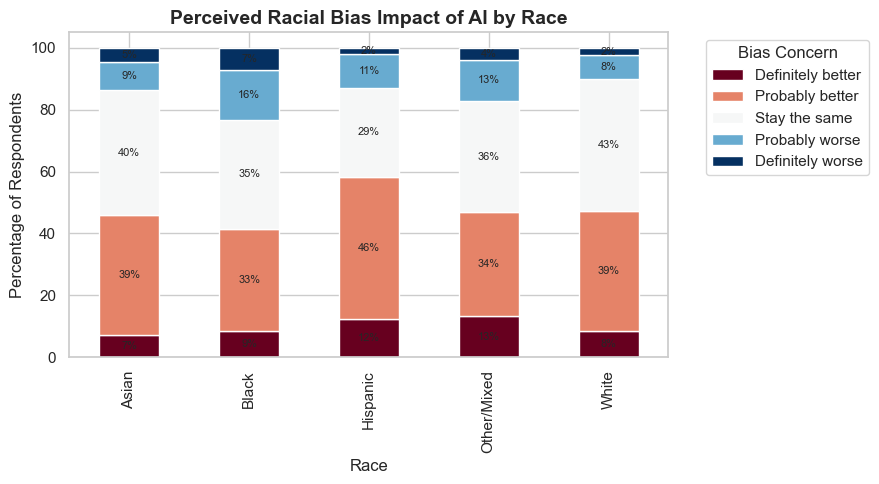

In [25]:
group_var = 'Race'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


Trust/ Comfort by Gender

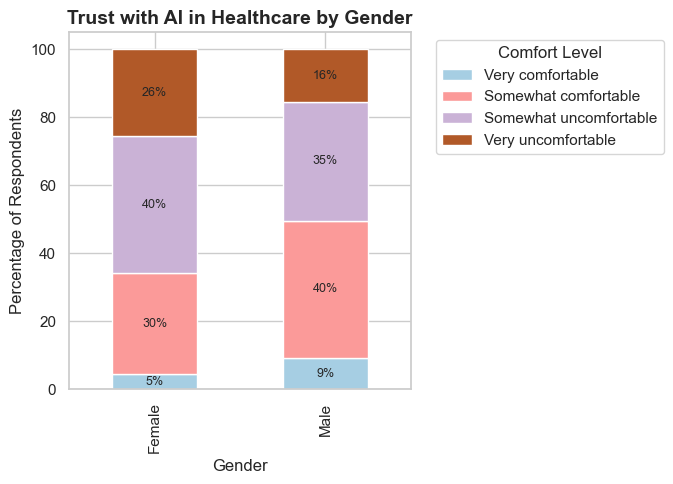

In [26]:
gender_comfort = pd.crosstab(
    clean_df['Gender'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

gender_comfort = gender_comfort[comfort_order]

ax = gender_comfort.plot(kind='bar', stacked=True, colormap='Paired', figsize=(7, 5))
plt.title('Trust with AI in Healthcare by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Gender')
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9)
plt.tight_layout()
plt.show()


Concern with Bias by Gender

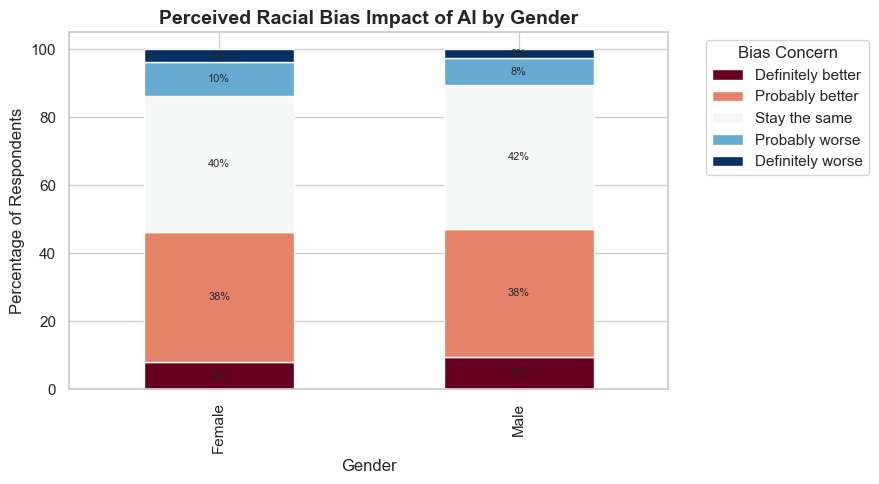

In [27]:
group_var = 'Gender'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


Trust/ Comfort by Political Ideology

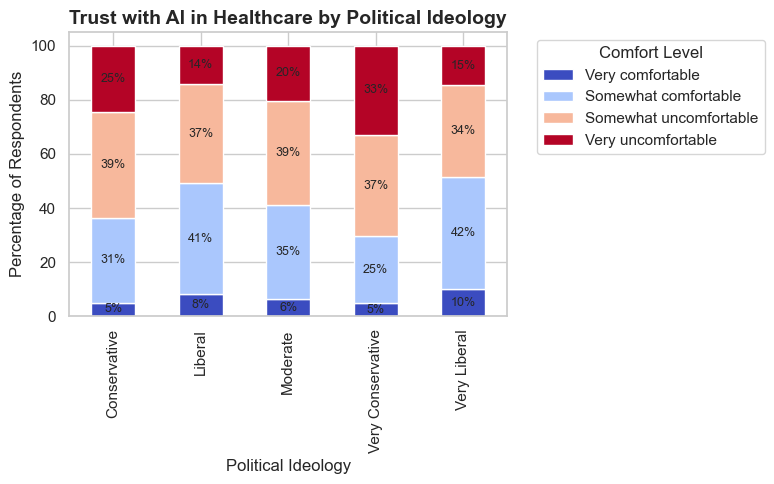

In [28]:
ideo_comfort = pd.crosstab(
    clean_df['Ideology'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

ideo_comfort = ideo_comfort[comfort_order]

ax = ideo_comfort.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))
plt.title('Trust with AI in Healthcare by Political Ideology', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Political Ideology')
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9)
plt.tight_layout()
plt.show()


Concern with Bias by Political Ideology

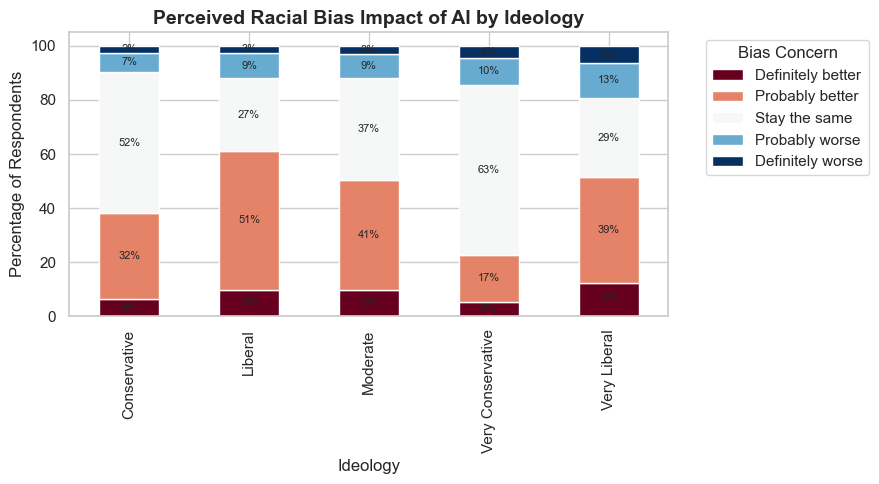

In [29]:
group_var = 'Ideology'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


Trust/ Comfort by Education Level

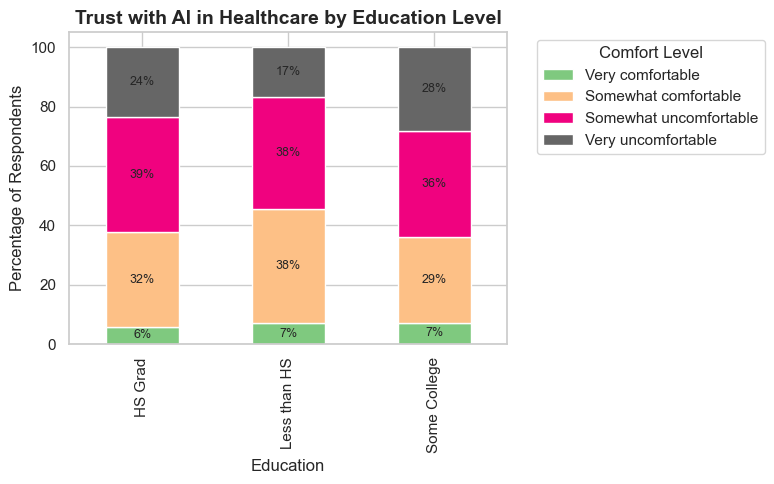

In [30]:
edu_comfort = pd.crosstab(
    clean_df['Education'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

edu_comfort = edu_comfort[comfort_order]

ax = edu_comfort.plot(kind='bar', stacked=True, colormap='Accent', figsize=(8, 5))
plt.title('Trust with AI in Healthcare by Education Level', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Education')
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9)
plt.tight_layout()
plt.show()


Concern with Bias by Education Level

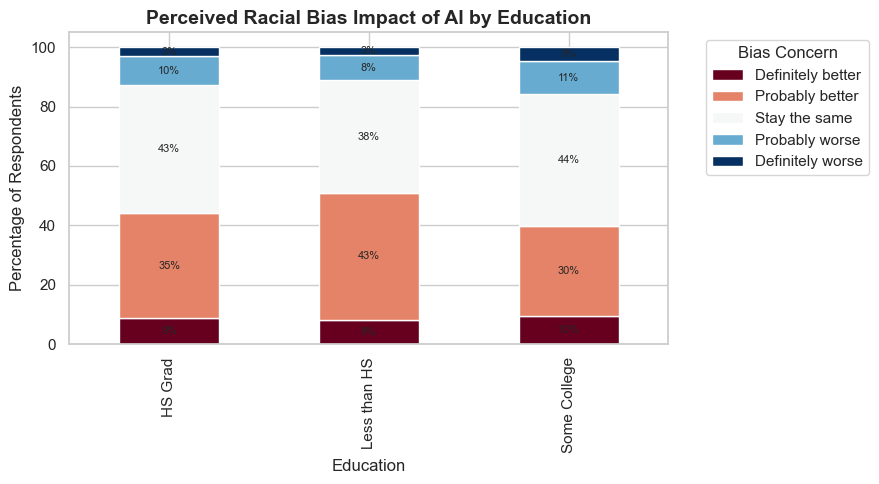

In [31]:
group_var = 'Education'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


Trust/ Comfort by Religion

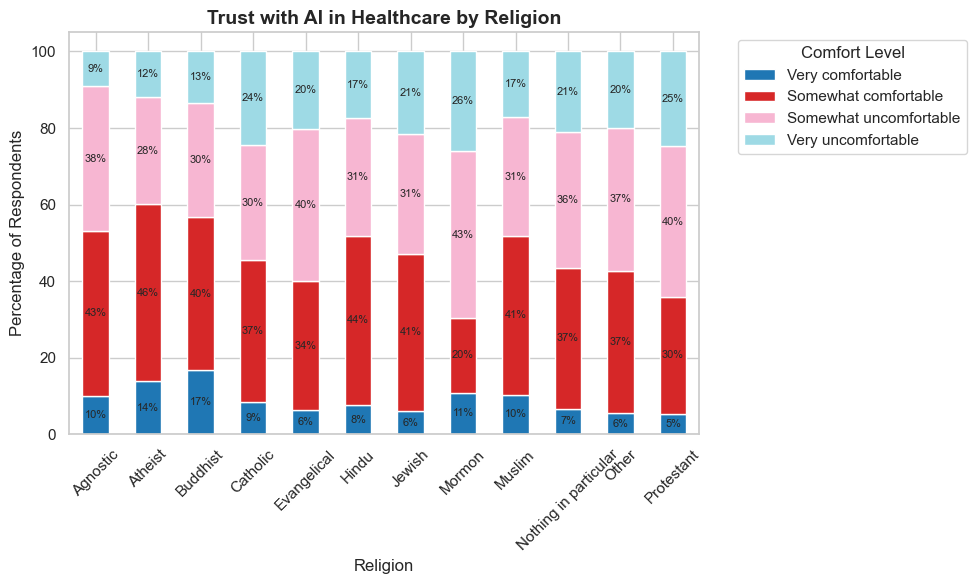

In [32]:
religion_comfort = pd.crosstab(
    clean_df['Religion'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

religion_comfort = religion_comfort[comfort_order]

ax = religion_comfort.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Trust with AI in Healthcare by Religion', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Religion')
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Concern with Bias by Religion

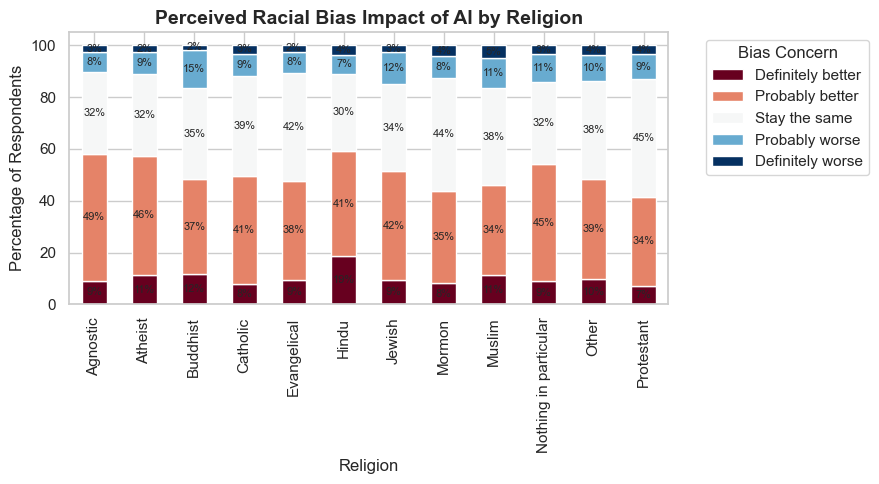

In [33]:
group_var = 'Religion'  # e.g., 'Race', 'Education', 'Religion', etc.

# Crosstab: Bias perception by demographic group
bias_group = pd.crosstab(
    df_subset[group_var],
    df_subset['Bias_Concern'],
    normalize='index'
) * 100

# Define correct label order
bias_order = [
    'Definitely better', 'Probably better',
    'Stay the same', 'Probably worse', 'Definitely worse'
]

# Ensure all labels exist
for label in bias_order:
    if label not in bias_group.columns:
        bias_group[label] = 0

# Reorder columns
bias_group = bias_group[bias_order]

# Plot
ax = bias_group.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(9, 5))
plt.title(f"Perceived Racial Bias Impact of AI by {group_var}", fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel(group_var)
plt.legend(title='Bias Concern', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()


What are the perceived risks (eg mistakes, data security, racial fairness) in AI assisted medical decisions? 

Perceived Risk of Mistakes 
- AI increasing or decreasing medical mistakes

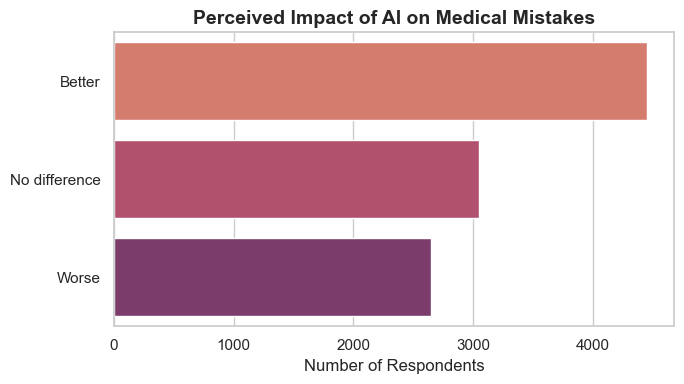

In [34]:
plt.figure(figsize=(7, 4))
mistake_order = ['Better', 'No difference', 'Worse']

sns.countplot(
    data=clean_df,
    y='AIHCCHG_MIST_W119_Label',
    order=mistake_order,
    palette='flare'
)

plt.title('Perceived Impact of AI on Medical Mistakes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Respondents')
plt.ylabel('')
plt.tight_layout()
plt.show()


Perceived Impact on Data Security 

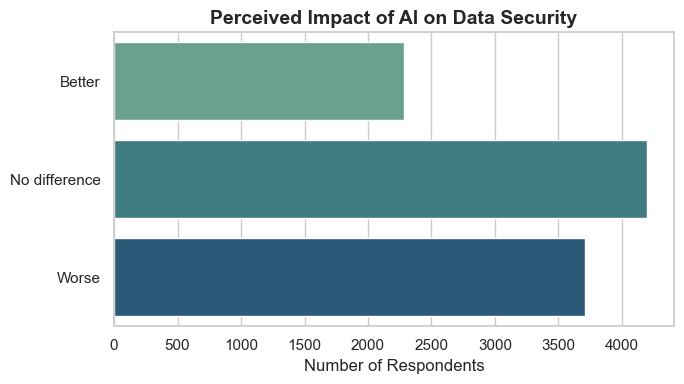

In [35]:
plt.figure(figsize=(7, 4))
security_order = ['Better', 'No difference', 'Worse']

sns.countplot(
    data=clean_df,
    y='AIHCCHG_SECUR_W119_Label',
    order=security_order,
    palette='crest'
)

plt.title('Perceived Impact of AI on Data Security', fontsize=14, fontweight='bold')
plt.xlabel('Number of Respondents')
plt.ylabel('')
plt.tight_layout()
plt.show()


Perceived Impact on Racial Fairness

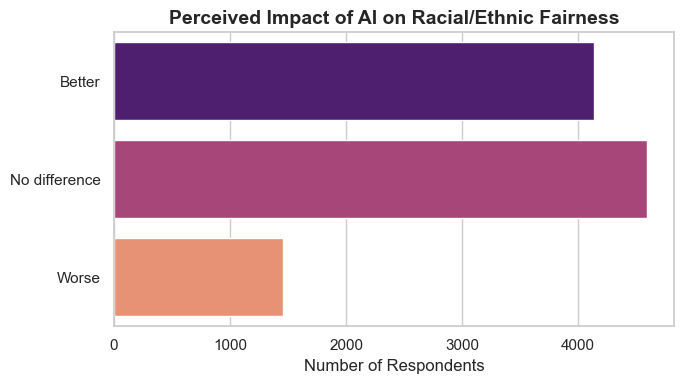

In [36]:
plt.figure(figsize=(7, 4))
fairness_order = ['Better', 'No difference', 'Worse']

sns.countplot(
    data=clean_df,
    y='AIHCCHG_RACETHN_W119_Label',
    order=fairness_order,
    palette='magma'
)

plt.title('Perceived Impact of AI on Racial/Ethnic Fairness', fontsize=14, fontweight='bold')
plt.xlabel('Number of Respondents')
plt.ylabel('')
plt.tight_layout()
plt.show()


NEXT STEPS: DETAILED ANALYSIS 

Create a "Perceived Risk Index"
- Quantify how risk-averse each respondant is 
- Use it as a predictor in regression or clustering 
- Compare risk levels across comfort, age, income, etc

Risk Scoring Strategy 
- Better: Score = 1 (Positive View)
- No Difference: Score = 2 (Neutral)
- Worse: Score = 3 (Negative View)


Sum all 3 to create a risk index 

Score range from 3(low concern) to 9 (high concern)

In [37]:
# Mapping for scoring
risk_score_map = {
    'Better': 1,
    'No difference': 2,
    'Worse': 3
}

# Apply to each risk variable
clean_df['Mistake_Score'] = clean_df['AIHCCHG_MIST_W119_Label'].map(risk_score_map)
clean_df['Security_Score'] = clean_df['AIHCCHG_SECUR_W119_Label'].map(risk_score_map)
clean_df['Fairness_Score'] = clean_df['AIHCCHG_RACETHN_W119_Label'].map(risk_score_map)

# Create overall risk index
clean_df['Risk_Index'] = clean_df[['Mistake_Score', 'Security_Score', 'Fairness_Score']].sum(axis=1)

# Quick look
clean_df[['Mistake_Score', 'Security_Score', 'Fairness_Score', 'Risk_Index']].head()


/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/3797115022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Mistake_Score'] = clean_df['AIHCCHG_MIST_W119_Label'].map(risk_score_map)
/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/3797115022.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Security_Score'] = clean_df['AIHCCHG_SECUR_W119_Label'].map(risk_score_map)
/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/3797115022.py:11: Se

,Mistake_Score,Security_Score,Fairness_Score,Risk_Index
0,2.0,2.0,2.0,6.0
1,1.0,3.0,1.0,5.0
2,3.0,2.0,2.0,7.0
3,2.0,2.0,2.0,6.0
4,3.0,2.0,2.0,7.0


Risk Index vs Comfort Level 

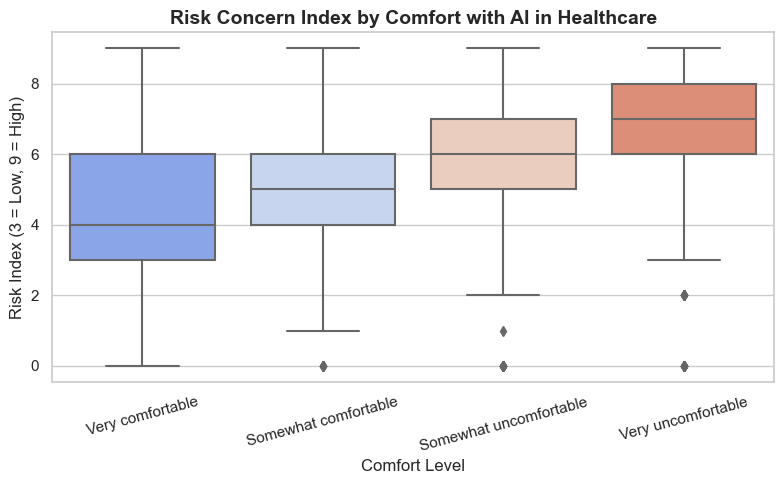

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid")

# Plot Risk Index by Comfort Level
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=clean_df,
    x='Comfort_Level',
    y='Risk_Index',
    order=[
        'Very comfortable',
        'Somewhat comfortable',
        'Somewhat uncomfortable',
        'Very uncomfortable'
    ],
    palette='coolwarm'
)

ax.set_title('Risk Concern Index by Comfort with AI in Healthcare', fontsize=14, fontweight='bold')
ax.set_xlabel('Comfort Level')
ax.set_ylabel('Risk Index (3 = Low, 9 = High)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Logistic Regression: Predict Trust (Binary)

- Shows how risk perception and knowledge affect likelihood of trust, controlling for demographics

In [39]:
import statsmodels.api as sm

# Prepare data (drop NaNs from modeling vars)
model_df = clean_df.dropna(subset=[
    'Trust_Binary', 'Risk_Index', 'AIKNOW_INDEX_W119',
    'F_AGECAT', 'F_EDUCCAT', 'F_INC_SDT1'
])

# Define independent variables (can add more if you like)
X = model_df[['Risk_Index', 'AIKNOW_INDEX_W119', 'F_AGECAT', 'F_EDUCCAT', 'F_INC_SDT1']]
X = sm.add_constant(X)  # Adds intercept

# Define dependent variable
y = model_df['Trust_Binary']

# Fit logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# View results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.586613
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Trust_Binary   No. Observations:                10263
Model:                          Logit   Df Residuals:                    10257
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.1342
Time:                        15:24:42   Log-Likelihood:                -6020.4
converged:                       True   LL-Null:                       -6953.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0898      0.144     14.494      0.000       1.807       2.372
Risk_Ind

K-means CLustering: Persona Segmentation

In [40]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# STEP 1: Select features for clustering
features_for_clustering = clean_df[[
    'Risk_Index',             # Concern about AI risks (3–9 scale)
    'AIKNOW_INDEX_W119',      # AI factual knowledge score
    'Trust_Binary',           # 1 = trusts AI, 0 = does not
    'F_AGECAT',               # Age category (1–4)
    'F_EDUCCAT',              # Education level (1–4)
    'F_INC_SDT1'              # Income level (1–9)
]].dropna()

# STEP 2: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# STEP 3: Run KMeans clustering (try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# STEP 4: Assign clusters back to your main DataFrame
clean_df.loc[features_for_clustering.index, 'Persona_Cluster'] = cluster_labels.astype(int)

# STEP 5: Summarize cluster traits to interpret
cluster_summary = clean_df.groupby('Persona_Cluster')[
    ['Risk_Index', 'AIKNOW_INDEX_W119', 'Trust_Binary']
].mean().round(2)

print("📊 Cluster Trait Summary:")
print(cluster_summary)


📊 Cluster Trait Summary:
                 Risk_Index  AIKNOW_INDEX_W119  Trust_Binary
Persona_Cluster                                             
0.0                    4.65               4.88          1.00
1.0                    6.13               1.96          0.27
2.0                    6.17               4.67          0.00


/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/3427558648.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[features_for_clustering.index, 'Persona_Cluster'] = cluster_labels.astype(int)


- Cluster 0: High knowledge, low concern = AI Advocates 
- Cluster 1: High Concern, low knowledge = Skeptics
- Cluster 2: Medium knowledge, medium concern = Cautious Optimists

In [41]:
persona_labels = {
    0: 'AI Advocates',
    1: 'Skeptics',
    2: 'Cautious Optimists'
}
clean_df['Persona_Label'] = clean_df['Persona_Cluster'].map(persona_labels)


/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/2158737237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Persona_Label'] = clean_df['Persona_Cluster'].map(persona_labels)


/var/folders/3n/b26hkpfd71x2jvpstpknt4ch0000gn/T/ipykernel_71521/743729992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Persona_Cluster'] = clean_df['Persona_Cluster'].astype(int)


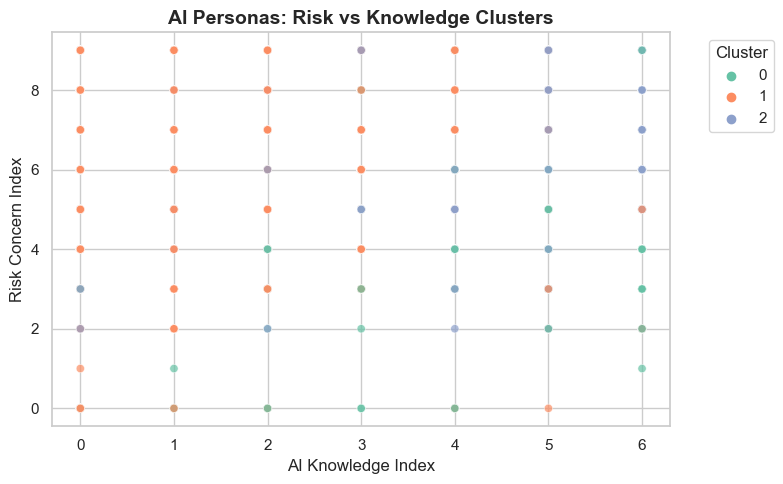

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure cluster column is numeric and clean
clean_df['Persona_Cluster'] = clean_df['Persona_Cluster'].astype(int)

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=clean_df,
    x='AIKNOW_INDEX_W119',
    y='Risk_Index',
    hue='Persona_Cluster',
    palette='Set2',
    alpha=0.7
)

plt.title('AI Personas: Risk vs Knowledge Clusters', fontsize=14, fontweight='bold')
plt.xlabel('AI Knowledge Index')
plt.ylabel('Risk Concern Index')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Comfort Level by Persona Cluster 

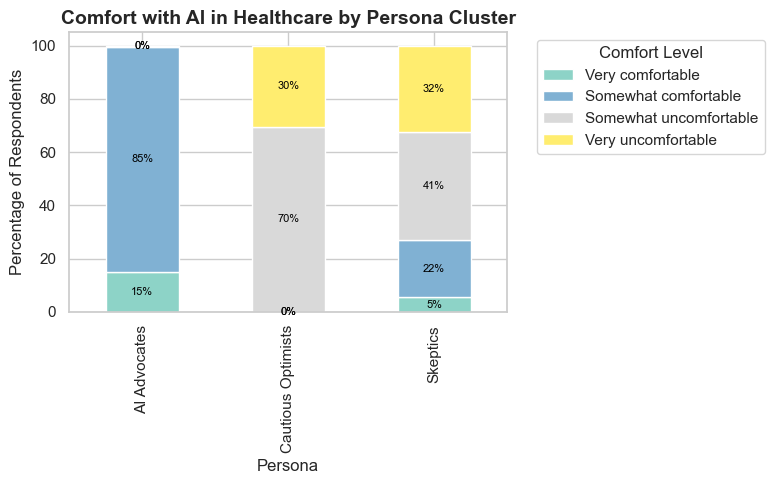

In [43]:
# Cross-tab of persona vs comfort level (%)
persona_comfort = pd.crosstab(
    clean_df['Persona_Label'],
    clean_df['Comfort_Level'],
    normalize='index'
) * 100

# Order comfort responses for clarity
comfort_order = [
    'Very comfortable', 'Somewhat comfortable',
    'Somewhat uncomfortable', 'Very uncomfortable'
]

# Reorder columns
persona_comfort = persona_comfort[comfort_order]

# Plot
ax = persona_comfort.plot(
    kind='bar',
    stacked=True,
    colormap='Set3',
    figsize=(8, 5)
)

plt.title('Comfort with AI in Healthcare by Persona Cluster', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Persona')
plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8, color='black')
plt.tight_layout()
plt.show()


Average Risk and Knowledge Scores by Persona

In [44]:
# Group by persona label
persona_stats = clean_df.groupby('Persona_Label')[['Risk_Index', 'AIKNOW_INDEX_W119']].mean().round(2)
persona_stats.reset_index(inplace=True)

# Display summary
print(persona_stats)


        Persona_Label  Risk_Index  AIKNOW_INDEX_W119
0        AI Advocates        4.65               4.88
1  Cautious Optimists        6.17               4.67
2            Skeptics        6.13               1.96


Demographic Breakdown by Persona

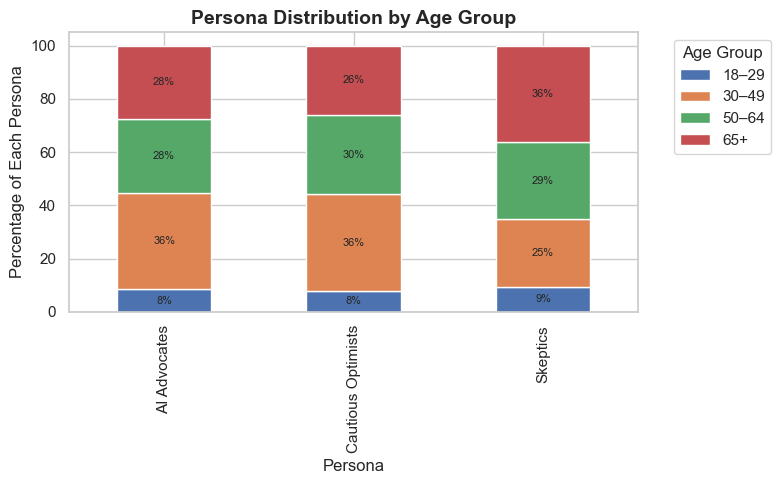

In [45]:
# Cross-tab of Persona vs Age Group
persona_age = pd.crosstab(clean_df['Persona_Label'], clean_df['Age Group'], normalize='index') * 100

# Plot stacked bar
ax = persona_age.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Persona Distribution by Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Each Persona')
plt.xlabel('Persona')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8)
plt.tight_layout()
plt.show()
